<h1>Project Title: Netflix Movies and TV Shows Project - Group ID: 3 </h1>

<h3>Group Members:</h3>
<p>
Suzan Kanigur

Gönül Zeynep Perek

Baran Çimen

Göktuğ Çalışkan

Alpaslan Hamzaoğlu
</p>

## Introduction

The main goal of this project is to bring the decision process on another level in which can be a guide for an investor in the film industry. 

A tool will be created in order to predict the director using the information of IMDB scores and release years. This tool can be used by the Movie/TV distributors such as Netflix, Amazon, Exxen etc. to choose which Movie/TV Shows they will be airing on their own streaming services. In the filming process, the relationships between the audience choices and the director is one of the key factors for efficiency. With an ongoing competitive online streaming sector, it is quite important for the investors to satisfy the audiences demands. Therefore, this tool will increase the streaming services' publicity. 

In order to find a correlation and understanding the data better, detailed exploration between the variables given in the data set are needed. Pie charts and plots have been created in order to understand the data better. A pie chart has been made between the show type counts of TV shows and Movies to see the distribution of users choices. Then, it is followed by the pie chart that shows the ratings of the Netflix Titles. Both calculations have been made in order to specify the main preferences of the Netflix users. Understanding the users tendency will shape the tool directly. Then, a plot has been created to see the growth rate of the content over the years in Netflix platform. It is important to see the leading countries in the film industry to specify a correlation and a valid causation. It has been listed in the top 20 producing countries according to the data set, followed by the top 5 list. Also rating and release years for each show have been inserted to bar charts in the end for a better visualization. 

By pointing out a correlation, it will be possible to detect the best working directors according to the IMDB scores and the release years of their respective works that they have worked on before. This tool aims to increase the investment potential of the film projects and will affect the industry itself by accelerating the financial process since an investor will be able to view key parameters by this tool within a combination of different perspectives together.


### Problem Definition


The main goal of this project is to make the potentials of the projects more visible for a potential investor in the film industry and help them decide with more valid reasons. The end goal of this project to create a tool in which a potential investor can visit anytime. 

Machine Learning methods will be used in order to create an algorithm which takes IMDB scores and release years from the data as inputs, in which the streamers being a potential investor with an idea, and outputs with the benefits of that option. The output will give the director's name, respectively. 

The data set have been seperated as %80 for training, %10 for test and %10 to validate the data. An IMDB Score level has been fixed in order to specify a valid score in this problem. The level has been selected as 6,16 for IMDB Score, the scores below that limit have been discarded from the data frame. Another change in the data set has been made by removing the actor names and titles in order to increase the efficiency of the algorithms.

All these information will be limited with the data sources that are currently in use for this project. The data will be filtered in detail and explored in many ways to specify each directors work. Each director will be matched with their works in different sections.

In the data set, we don't have enough information to work on the problem. In order to have the valid data for the given problem, we had to retrieve IMDB scores of the Movies/TV Shows in the data set. While working on this process, web scraping tools have been used with api keys. 


Two different machine learning methods have been used in the following sections, as Decision Tree and Random Forest.

### Utilized Datasets


<p>The most used data is the Netflix movies and TV Shows data set, and the reference link is given at the end. In this project a relationship determined between IMDB scores, release years and directors for that specific variables. It has been found that in director data there exist lots of null datas because the data set just shows the Netflix movie directors, since there is not a data for Netflix TV shows directors. So for the first step, the null values needed to be cleared from the data. The figure of how much null data is in the next cell (Figure 1). Another point is that there is a lacking of the data for ranking or scores of shows, which inhibits us to find the success rates of the shows. In the data set we have 12 different data for Netflix movies and TV shows and these are Unique ID's for every Movie / Tv Show, Identifier - A Movie or TV Show, Title of the Movie / Tv Show, Director of the Movie, Actors involved in the movie / show, Country where the movie / show was produced, Date it was added on Netflix, Actual Release year of the move / show, TV Rating of the movie / show, Total Duration - in minutes or number of seasons, Genere, The summary description. Data has 6172 unique Netflix movies and TV shows (both included). We have made different plots to show the data more precisely. 

Another data source has been used in order to reach the IMDB ratings of the shows. We used an API to get the IMDB ratings of the movies and TV shows. The API required a key which was free but had a daily usage limit of 1000. We got multiple keys and re-run the code in order to receive the IMDB ratings. The level has been selected as 6,16 for IMDB Score, the scores below that limit have been discarded from the data frame. 

The only problem is, if the TV show/Movie is added to Netflix in another year than the release year, the API was unable to find the show and filler the rating as “NaN”. Also, if a TV Show/ Film is found in IMBD database but no IMDB score is found, them the IMDB rating is filled with “N/A”.
</p>

Link for data set: https://www.kaggle.com/shivamb/netflix-shows

In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join

%matplotlib inline

In [ ]:
from collections import Counter
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

In [ ]:
fname = "netflix_titles.csv"
df = pd.read_csv(join(path_prefix, fname))

In [ ]:
title_type = df.groupby('type').agg('count')
print(title_type)

         show_id  title  director  ...  duration  listed_in  description
type                               ...                                  
Movie       4265   4265      4137  ...      4265       4265         4265
TV Show     1969   1969       128  ...      1969       1969         1969

[2 rows x 11 columns]


In [ ]:
#A pie chart has been made between the show type counts of TV shows and Movies to make the distribution of user's choices visible:

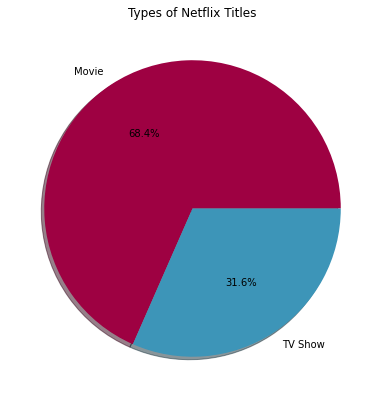

In [ ]:
label = title_type.show_id.index  #TV Show and Movie
count = df.type.value_counts()    #TV Show and Movie Counts


plt.figure(1, figsize = (30,15)) 
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('Spectral')


plt.subplot(the_grid[0, 1], aspect = 1, title = 'Types of Netflix Titles')
type_show_ids = plt.pie(count, labels=label, autopct = '%1.1f%%', shadow = True, colors = [cmap(i) for i in np.linspace(0, 7, 9)])
plt.show()

In [ ]:
#Another pie chart has been made to show the distribution of the ratings for Netflix Titles:

In [ ]:
rating_title = df.groupby('rating').agg('count')
rating_labels = rating_title.show_id.sort_values().index 
rating_counts = rating_title.show_id.sort_values()

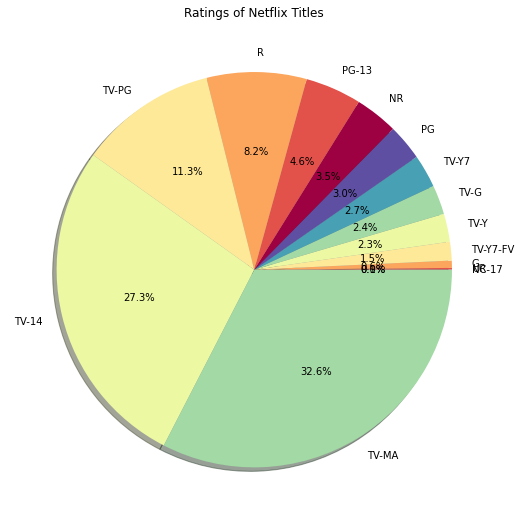

In [ ]:
plt.figure(1, figsize=(30,20))
grid = GridSpec(2, 2)
cmap = plt.get_cmap('Spectral')
plt.subplot(grid[0, 1], aspect=1, title='Ratings of Netflix Titles')
show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True, colors=[cmap(i) for i in np.linspace(0, 1, 8)])
plt.show()

In [ ]:
def group_lower_ranking_values(column):
    rating_num = df.groupby(column).agg('count')
    value = rating_num[lambda x: x.columns[0]].quantile(.75)
    below_pct = rating_num[lambda x: x.columns[0]].loc[lambda s: s < value].index.values
    def fix_values(row):
        if row[column] in below_pct:
            row[column] = 'Other'
        return row 
    grouped_rating = df.apply(fix_values, axis=1).groupby(column).agg('count')
    return grouped_rating

In [ ]:
grouped_rating = group_lower_ranking_values('rating')
label_rating = grouped_rating.show_id.sort_values().index 
count_rating = grouped_rating.show_id.sort_values()

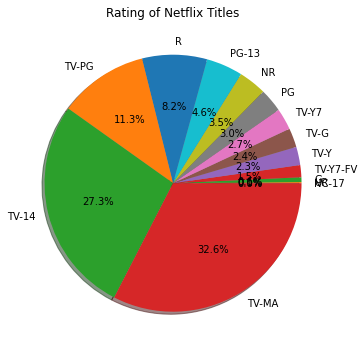

In [ ]:
plt.subplot(the_grid[0, 1], aspect=1, title='Rating of Netflix Titles')
type_show_ids = plt.pie(rating_counts, labels=rating_labels, autopct='%1.1f%%', shadow=True)#, colors=colors)
plt.gcf().set_size_inches((25, 13)) 
plt.show()

<h3>Here is the code part of how we get the IMDB ratings from IMDB web sites.</h3>

In [ ]:
df = pd.read_csv(join(path_prefix, fname))

title_list = df.title.T.values.tolist()
array_for_title = np.array(title_list)
print(array_for_title.reshape(6234,1))

print(" ")
year_list = df.release_year.T.values.tolist()
array_for_year = np.array(year_list)
print(array_for_year.reshape(6234,1))

import requests
endpoint = "http://www.omdbapi.com/?apikey=8e22b2aa&t=Norm%20of%20the%20North:%20King%20Sized%20Adventure&y=2019"
res = requests.get(endpoint)
print(res.json())

k = 0
for i in range( len(array_for_title)):
  show = array_for_title[i]
  year = array_for_year[i]
  key = "7055d37f"
  endpoint = "http://www.omdbapi.com/?apikey={}&t={}&y={}".format(key, show, year)
  res = requests.get(endpoint)
  # get the imdb rating from retrieved json object
  try:
    df["imdbRating"][i] = res.json()["imdbRating"]
    #rows.append({"imdbRating": res.json()["imdbRating"]})
  except:
    df["imdbRating"][i] = "NaN"
    #rows.append({"imdbRating": "NaN"})
  k+=1
  if k == 900:
    break

print(df)
compression_opts = dict(method='zip',
                        archive_name='out_final.csv')  
df.to_csv('out_finalllll.zip', index=False,
          compression=compression_opts)  
!cp out_finalllll.zip "drive/My Drive/"

## Data Exploration


<p>
In the dataset, which we obtained from kaggle.com, it can be seen that there are 12 different data for each movie / TV Show. The data consists of:


1.   Show ID (Unique ID for every Movie / Tv Show)
2.   Type (Movie / TV Show)
3.   Title
4.   Director
5.   Cast
6.   Country  (Country where the movie / show was produced)
7.   Date Added (Date it was added on Netflix)
8.   Release Year (Actual Release year of the movie / show)
9.   Rating (TV Rating of the movie / show )
10.  Duration (Total Duration - in minutes or number of seasons)
11.  Listed in (Genre of the movie / show)
12.  Description

Best relationship across this dataset that can be observed comes from the relationship between Rating - Listed in as particular genres can only be observed in (nearly) specific TV ratings. To give a few examples, "Children & Family movies" and "Kids Movies" exists only in the following ratings: TV-PG, TV-Y7, TV-Y7-FV and TV-G.

There is also the relationship between "Country" and "Listed in" as the genre "Spanish Language TV Shows" can be found to be produced in Spanish speaking countries such as Spain, Colombia, Mexico and United States.

</p>

It has been inserted to a graph which demonstrates the content growth over the years. It is important for an investor to see the lack of content so that they can make a more reasonable investment according to the type of show. 

In [ ]:
#Getting the counts for both Movie and TV Show:
df_c = df.fillna('NULL')
df_c['year_added'] = df_c['date_added'].apply(lambda x: x.split(',')[-1])

# We didn't want to include 2020 since the year just started not too long so it wont give a 
# a good insight of the year.
df_c['year_added'] = df_c['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
df_c['year_added'] = df_c['year_added'].apply(int)

year_data = df_c['year_added'].value_counts().sort_index().loc[:2019]
type_data = df_c.groupby('year_added')['type'].value_counts().unstack().fillna(0).loc[:2019]

In [ ]:
#We have checked the trend of growth over the years:

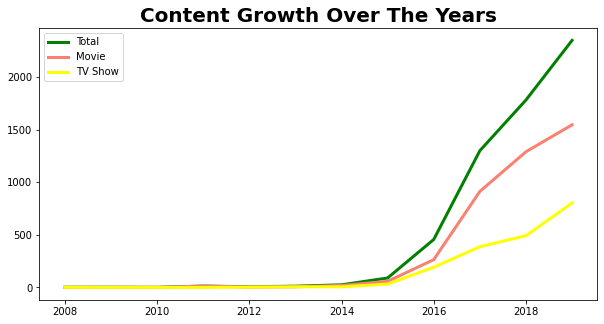

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(year_data.index, year_data, color = 'green', linewidth=3, label='Total')
ax.plot(type_data.index, type_data['Movie'], color='salmon', linewidth=3, label='Movie')
ax.plot(type_data.index, type_data['TV Show'], color='yellow', linewidth=3, label='TV Show')

ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_title('Content Growth Over The Years', fontsize=20, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)

The producing countries are listed in order to specify the leading countries in the film industry. It will be useful for us to detect the most experienced project by linking them to their locations.

In [ ]:
from collections import Counter
# Split the column 'countries' and store them in countries as List
countries = ','.join(df_c['country']).replace(' ,',',').replace(', ',',').split(',')
# Take the countries List and count them with the Counter as Series
count_country = pd.Series(dict(Counter(countries))).sort_values(ascending=False)
count_country.drop(['NULL'], axis=0, inplace=True) #Drop NULL s

total = sum(count_country)
top_20 = sum(count_country[:20])
top20Countries = count_country[:20] #getting data

In [ ]:
#Also the top 20 producing countries are listed below:

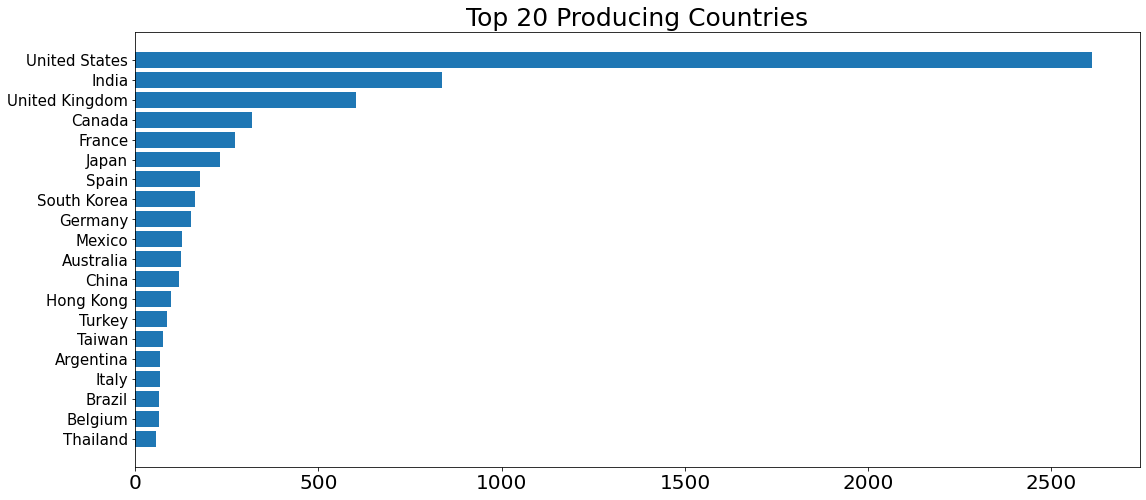

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(18, 8))
ax.barh(top20Countries.index, top20Countries)
ax.set_title('Top 20 Producing Countries', fontsize=25)
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=20)
ax.invert_yaxis()

In [ ]:
#Then the top 5 are listed below:

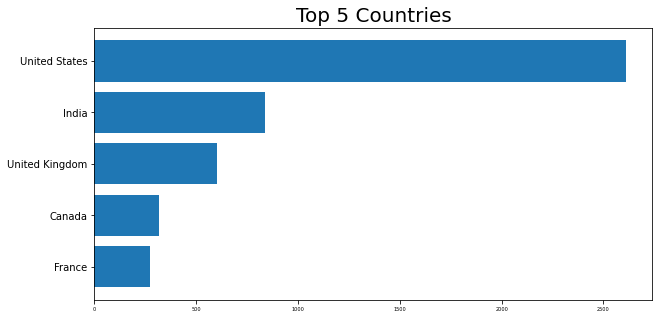

In [ ]:
top5countries = count_country[:5]

fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.barh(top5countries.index, top5countries)
ax.invert_yaxis()
ax.set_title("Top 5 Countries", fontsize=20)
ax.yaxis.set_tick_params(labelsize=10)
ax.xaxis.set_tick_params(labelsize=5)

Bar charts are created in order to see the ratings according to the show types. It is important to understand the data to create a tool which aims to improve the content and the sector itself.

In [ ]:
#Bar charts for ratings to increase the visuality:

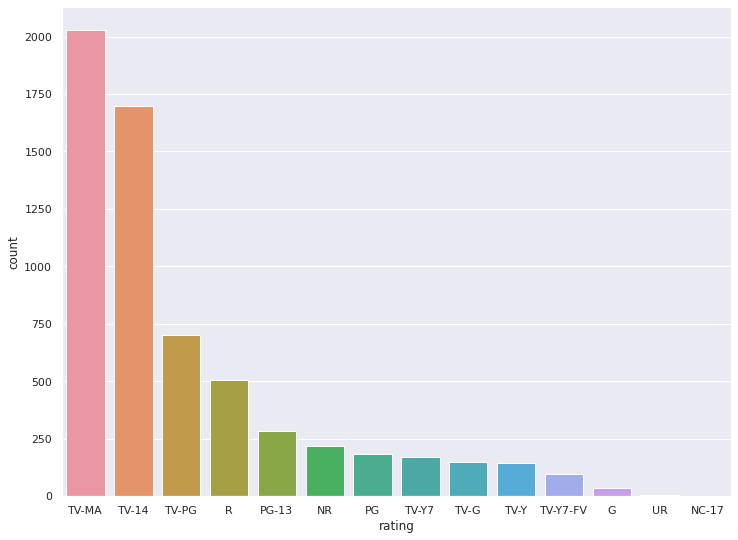

In [ ]:
import seaborn as sns
sns.set()
rating = df['rating']
plt.figure(figsize = (12,9))
sns.countplot(x="rating",data = df,order=rating.value_counts().index[0:14])
plt.savefig('rating_fig.png')

In [ ]:
#Bar charts for release years are created to see the most productive year in the data set.

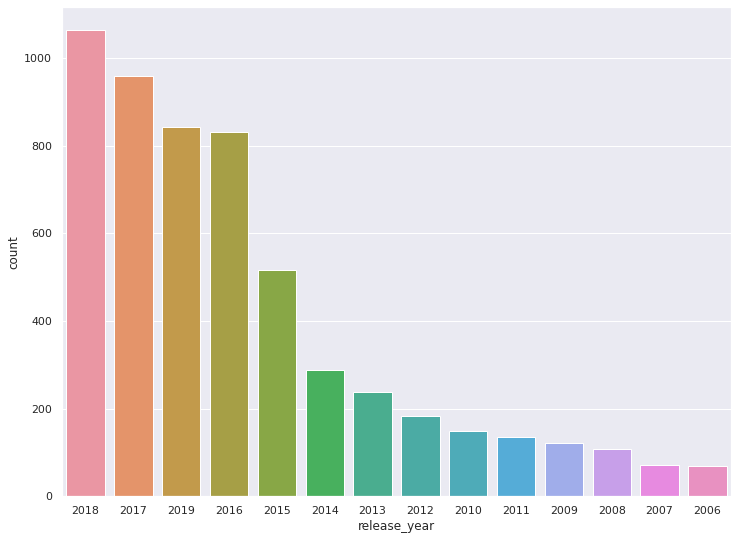

In [ ]:
plt.figure(figsize=(12,9))
sns.countplot(x="release_year",data=df,order = df['release_year'].value_counts().index[0:14])
plt.savefig('release_year_fig.png')

## Machine Learning Models


There are two machine learning models that are used in our algorithm. The first model that has been used is Decision Trees. It has been decided that this model can be useful for our problem since there are different parameteres to perform and analize between each other. It has been focused to use different variables as year, IMDB scores, directors and actors for the implementation of machine learning models. 

Second method that we used is the Random Forest, which will help us understand the prediction between the show's IMDB ratings and the release years. The algorithm mainly aims to predict the director's name according to the given IMDB Scores and release years. Since actor names and titles have been removed before processing the algorithm, only important level can be stated as the IMDB score threshold which is 6,16. 

The data have been seperated accordingly, %80 for train data, %10 for test data and %10 for validation. 

Accuracy scores have been checked with respect to the same data set in order to find the difference. 

Best parameters have been determined via Grid Search CV for Random Forest implementation.


### Implementation



<h4>
Here is the first implemention of machine learning model of decision trees. 
</h4>

In [ ]:
fname = "out_final.csv"
df = pd.read_csv(join(path_prefix, fname))
df.replace("NaN", np.nan)
df.replace("N/A", np.nan)
df = df.dropna()

df10 = pd.DataFrame(columns=['title', 'director', 'actor', 'IMDBscore', 'year'])

for i in df.index:
  list_a = []
  if ',' in df.loc[i, 'cast']:
    list_a = df.loc[i, 'cast'].split(', ')
  else:
    list_a.append(df.loc[i, 'cast'])
  list_d = []
  if ',' in df.loc[i, 'director']:
    list_d = df.loc[i, 'director'].split(', ')
  else:
    list_d.append(df.loc[i, 'director'])
  for k in range(len(list_a)):
    for l in range(len(list_d)):
      df10.loc[len(df10.index)] = [df.loc[i, 'title'], list_d[l], list_a[k], df.loc[i, 'imdbRating'], df.loc[i, 'release_year']]   

df11 = df10
for i in df11.index:
  if df11.loc[i, 'IMDBscore'] > 6.16:
    df11.loc[i, 'rate'] = '1'
  else:
    df11.loc[i, 'rate'] = '0'

In [ ]:
df11['dir-act'] = df11['director'] + ' - ' + df11['actor']

In [ ]:
for i in df11.index:
  if df11.loc[i, 'IMDBscore'] > 6.16:
    df11.loc[i, 'rate'] = 1
  else:
    df11.loc[i, 'rate'] = 0

In [ ]:
df121 = pd.DataFrame(columns=['title', 'director', 'actor', 'IMDBscore', 'year', 'rate', 'dir-act' ])

idx = 0
for i in df11.index:
  if df11.loc[i, 'rate'] == 1:
    df121.loc[idx] = df11.loc[i]
    idx+=1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

df101 = df121.drop(columns=['title', 'actor', 'dir-act'])
df101 = df101.iloc[:1600]

X = df101.drop(columns=["director"])
y = df101["director"]

X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, random_state=1, test_size=0.20)
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, random_state=1, test_size=0.50)

model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train, y_train)

print("\n", export_text(model, feature_names=list(X.columns)))


 |--- IMDBscore <= 6.95
|   |--- year <= 2015.50
|   |   |--- IMDBscore <= 6.65
|   |   |   |--- year <= 2007.50
|   |   |   |   |--- IMDBscore <= 6.45
|   |   |   |   |   |--- year <= 2001.00
|   |   |   |   |   |   |--- year <= 1995.50
|   |   |   |   |   |   |   |--- class: Curtis Hanson
|   |   |   |   |   |   |--- year >  1995.50
|   |   |   |   |   |   |   |--- class: Phillip Noyce
|   |   |   |   |   |--- year >  2001.00
|   |   |   |   |   |   |--- year <= 2005.50
|   |   |   |   |   |   |   |--- class: Roger Kumble
|   |   |   |   |   |   |--- year >  2005.50
|   |   |   |   |   |   |   |--- class: Wilson Yip
|   |   |   |   |--- IMDBscore >  6.45
|   |   |   |   |   |--- year <= 2002.50
|   |   |   |   |   |   |--- year <= 1991.50
|   |   |   |   |   |   |   |--- class: Rajiv Mehra
|   |   |   |   |   |   |--- year >  1991.50
|   |   |   |   |   |   |   |--- class: Rob LaDuca
|   |   |   |   |   |--- year >  2002.50
|   |   |   |   |   |   |--- year <= 2005.50
|   |   |   | 

In [ ]:
cross_val_score(model, X_train, y_train, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.58984375, 0.63671875, 0.62890625, 0.6015625 , 0.58984375])

In [ ]:
print("Decision Tree Train Accuracy:"+str(accuracy_score(y_train, model.predict(X_train))))

Decision Tree Train Accuracy:0.63984375


In [ ]:
dt_predictions = model.predict(X_test)
accuracy_score(y_test, dt_predictions)

0.48125

<h4>
Here is the second implemention of machine learning model of Random Forest.
</h4>

In [ ]:
model_rf = RandomForestClassifier(random_state=1, n_estimators=100)
model_rf.fit(X_train, y_train) 
cross_val_score(model_rf, X_train, y_train, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.59375   , 0.640625  , 0.62890625, 0.61328125, 0.58984375])

In [ ]:
cross_val_score(model_rf, X_train, y_train, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


array([0.59375   , 0.640625  , 0.62890625, 0.61328125, 0.58984375])

In [ ]:
rf_predictions = model_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predictions)
print("Random Forest Train Accuracy:"+str(accuracy_score(y_train, model_rf.predict(X_train))))
print("Random Forest Test Accuracy:"+str(rf_acc))

Random Forest Train Accuracy:0.63984375
Random Forest Test Accuracy:0.48125


In [ ]:
from sklearn.model_selection import GridSearchCV 
param_grid = { 
    'random_state': [32, 61],
    'n_estimators': [50, 75],
    'min_samples_split': [2, 4],
    'max_depth': [16, 32]
}

rf_predictions = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf_predictions, param_grid=param_grid)
rf_grid.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [ ]:
rf_grid.best_params_ 

{'max_depth': 16,
 'min_samples_split': 2,
 'n_estimators': 75,
 'random_state': 61}

In [ ]:
grid_predictions = rf_grid.predict(X_val)
accuracy_score(y_val, grid_predictions)

0.59375

### Results & Discussion

<p>
The first use of the machine learning model in our project is the Decision Tree. The implementation of that model is currently working slowly due to the usage of nested loops with pandas dataframe. It takes 1-3 minutes to execute it. We tried different approaches on our problem and came up with different implementations. For decision tree model we have found the successful directors based on IMDB ratings filtered by the release years of the projects. Before processing the model, actor and title names have been removed from the data, then the model gets the IMDB score and release year. Branches have been created according to those values. Then, x data gets the panda dataframe without directors and y gets the panda dataframe with directors. As a result of the model, tree shows the director according to the release year and the IMDB scores.


The second usage of the machine learning demonstrates the best parameters as max_depth being 16, min_samples_split as 2, n_estimators as 75 and random_state as 61. Fundamental motivation under finding the best parameters is to increase the accuracy level, which had an increase from %48,12 to %59,37 with those in use.

In the training process, director-actor variables have been paired at first, then it resulted as a failure because there have been lot's of unique pairs appeared which makes the accuracy hard to find. Then, it has been decided to continue with only director.


Finally it shows the most successful directors according to their projects' IMDB scores and release years.  We also keep the other codes which we do not use in this implementation, to show our trials.
</p>

## Conclusion
The main goal of the project is to specify the main experiences of the directors given to be a guide for the potential investors in the film industry. 

To expand the data and be able to create more valid outcomes, IMDB ratings for the shows are used. One of the problems that occured in that process is that if the TV show/Movie is added to Netflix in another year than the release year, the API was unable to find the show and filler the rating as “NaN”. Also, if a TV Show/ Film is found in IMBD database but no IMDB score is found, them the IMDB rating is filled with “N/A”.

Another problem in the data set is that the lack of numeric data. For a more valid Machine Learning implementation, more numeric variables are needed. In order to have a valid data, IMDB ratings are added. Also in the future, the directors can be matched with a number which represents them so that they can be used in the ML process.

## Further Interests


The main goal of this project is to make the potentials of the projects more visible for a potential online streaming investor in the film industry and help them decide with more valid reasons. The end goal of this project to create a tool in which a potential investor can input a director name and get an output with the benefits of that option.

Machine Learning methods are being used in order to create an input output system which has a fixed level of experience to refer. Since the data contains lots of strings, Machine Learning methods are limited for us to use. Some data are hard to integrate with the Machine Learning process. In order to solve that problem, it can be improved by converting the strings into unique numeric vairables. 

Also new Machine Learning methods can be considered untill it can give the intended outputs from the algorithm itself.

Experimented methods are lacking to specify the correlation between the director and actor and are not enough to create the expected outputs. String based Machine Learning methods will be considered in the following times and for the final work.

## Work Division



The task has been divided into 5 parts among teammates as the Data Visualisation process, Machine Learning, collecting the IMDB Data, Data Processing and the final transcription of the work done. 

Suzan and Zeynep have worked on the data processing such as plotting the data and getting a clear visualisation and correlation between variables in detail.

Baran have worked on getting the IMDB data via web scraping and added it on the main excel data in a way which the mentioned data can be used in the following process.

Baran, Goktug and Alpaslan have worked on the Machine Learning process in detail and done the implementations of the methods that has been decided to work within the algorithm.

Then, all the work done was transcripted and reported in detail.
